Coefficients of the polynomial is [ 5.58509352e-01 -7.37862114e+00  9.74809998e+01 -1.28784838e+03] where order is 3.


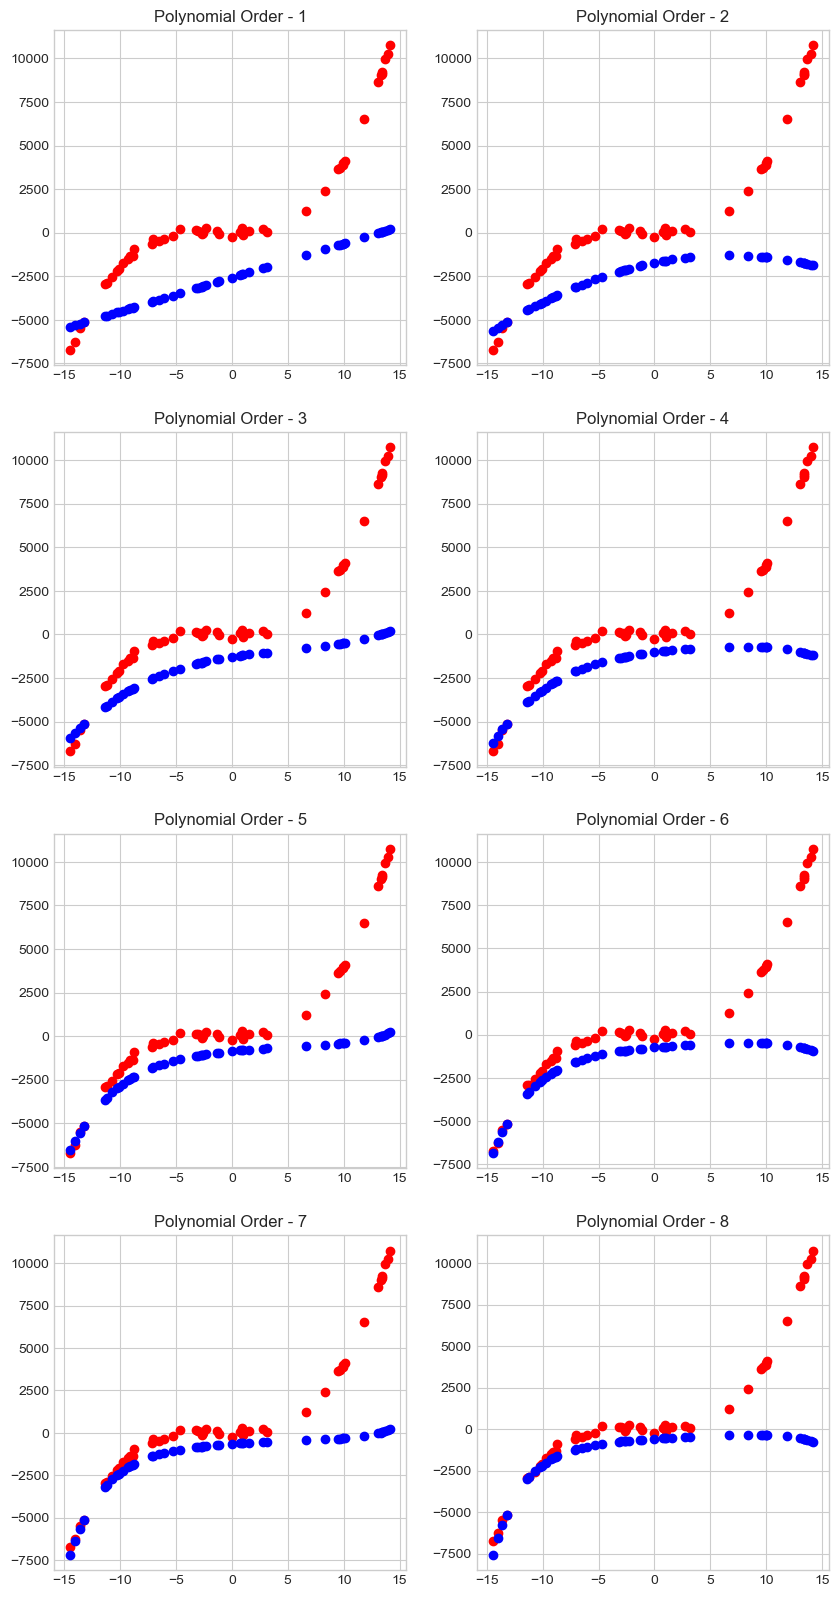

In [8]:
#Q1 -  Please plot the noisy data and the polynomial you found (in the same figure). Please use 
# polynomial order of m = 1, 2, 3, 4, 5, 6, 7, 8, respectively

#Ignoring warning messages
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
noise_scale = 100
number_of_samples = 50
x = 30*(np.random.rand(number_of_samples, 1) - 0.5)
y = 2 * x + 11 * x**2 + 3 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)
# Printing coefficients of the polynomial
print("Coefficients of the polynomial is {} where order is 3.".format(np.polyfit(x[0],y[0],3)))
figure, axis = plt.subplots(4,2,figsize=(10, 20))
for i,ax in zip([1,2,3,4,5,6,7,8],axis.flatten()):
    z = np.polyfit(x[0],y[0],i)
    # calculating the ploynimial value using poly1d
    poly = np.poly1d(z)
    polyArr = poly(x)
    # Using subplot to plot muliple graphs in single figure.
    ax.set_title("Polynomial Order - {}".format(i))
    ax.plot(x,y,'ro')
    ax.plot(x,polyArr,'ro',color='b', label='Polynomial')

[21170608.31285128, 25328648.655193485, 17443489.572075833, 20502021.18193357, 16316715.874661675, 18726852.355344165, 15861292.153927196, 17902245.340525307]


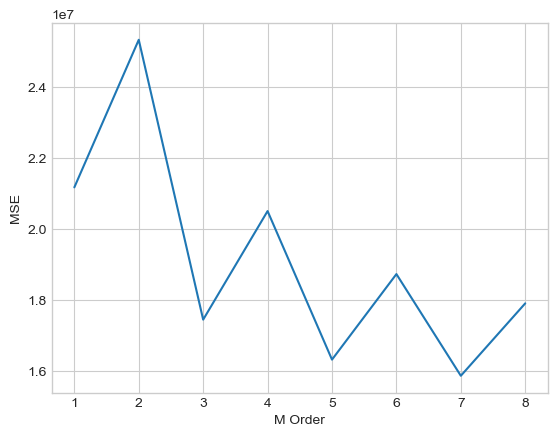

In [9]:
#Q2 - Plot MSE versus order m, for m = 1, 2, 3, 4, 5, 6, 7, 8 respectively. Identify the best choice of m

mseArr = []
m = [1,2,3,4,5,6,7,8]
for i,ax in zip(m,axis.flatten()):
    z = np.polyfit(x[0],y[0],i)
    poly = np.poly1d(z)
    polyArr = poly(x)
    #Calculating MSE using numpy. 
    mse = np.mean((y-polyArr)**2)
    mseArr.append(mse)
print(mseArr)
plt.xlabel("M Order")
plt.ylabel("MSE")
plt.plot(m,mseArr, label='Polynomial')

#7th Order Polynomial is best fit for noisy data as the mean squared error is lowest among all. 
#Higher or lower order polynomial will over fit or under fit the data. 

In [14]:
bestOrderPolynomial = mseArr.index(min(mseArr))+1
print(bestOrderPolynomial)

7


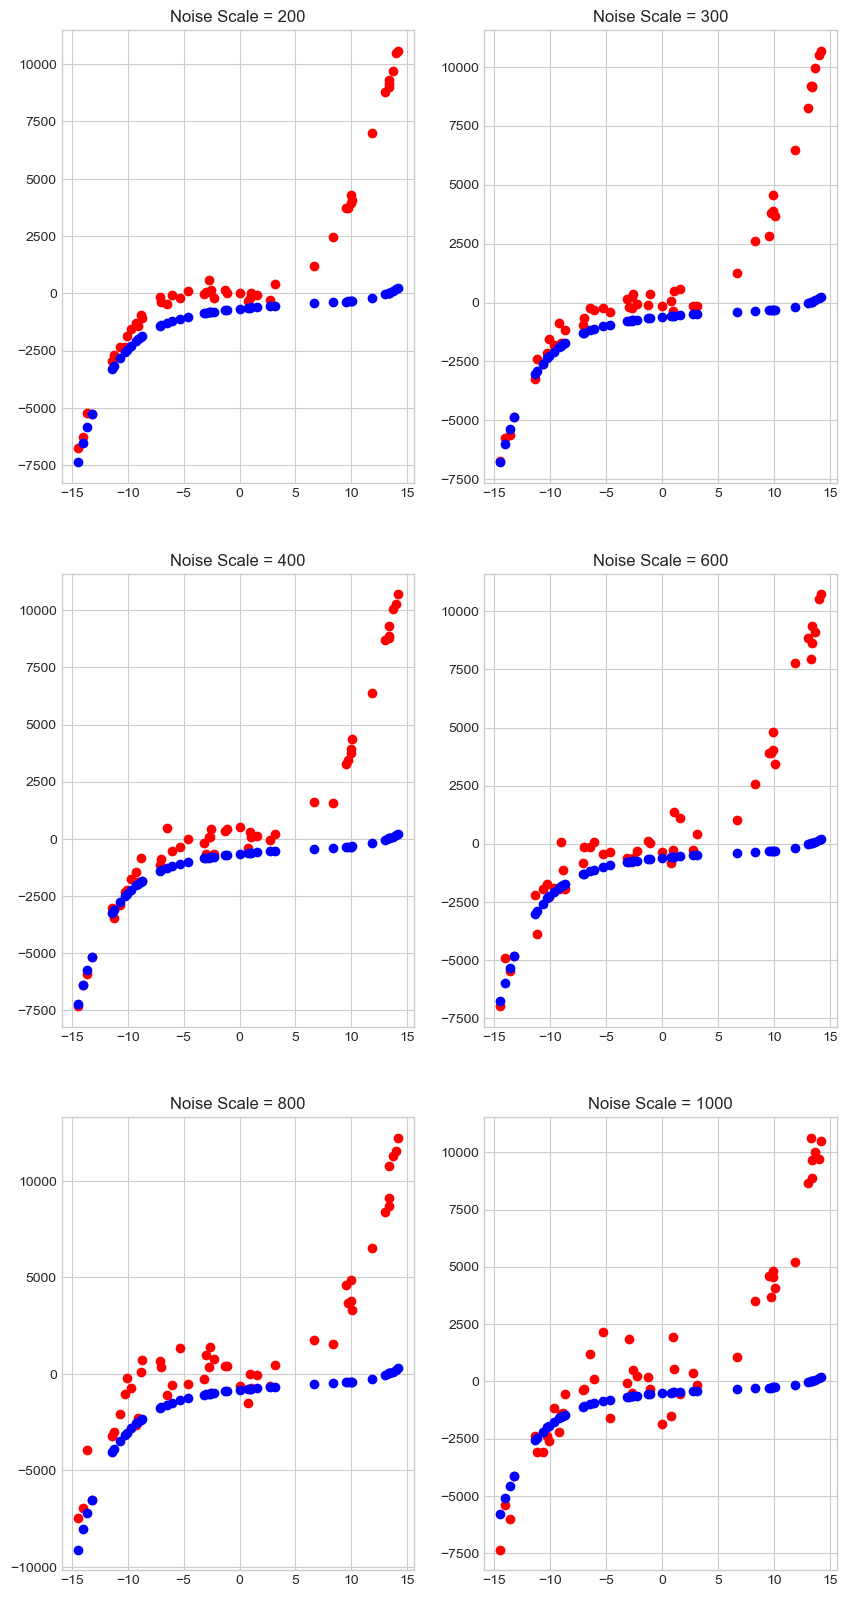

In [15]:
#Q3 - Change variable noise_scale to 200, 300, 400, 600, 800, 1000 respectively, re-run the algorithm
# and plot the polynomials with the best m found in 2). Discuss the impact of noise scale to the 
# accuracy of the returned parameters. [You need to plot a figure for EACH choice of noise_scale.

noise_scaleArr = [200,300,400,600,800,1000]
figure, axis = plt.subplots(3,2,figsize=(10, 20))
for noise_scale,ax in zip(noise_scaleArr,axis.flatten()):
    number_of_samples = 50
    y = 2 * x + 11 * x**2 + 3 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)
    z = np.polyfit(x[0],y[0],bestOrderPolynomial)
    poly = np.poly1d(z)
    polyArr = poly(x)
    ax.set_title("Noise Scale = {}".format(noise_scale))
    ax.plot(x,y,'ro')
    ax.plot(x,polyArr,'ro',color='b', label='Polynomial')
    
#As we keep on increasing the noise scale,the data points are getting more and more deviated and
#the MSE of 7th Order polynomial increases which leads to overfitting of the data. hence accuracy decreases.

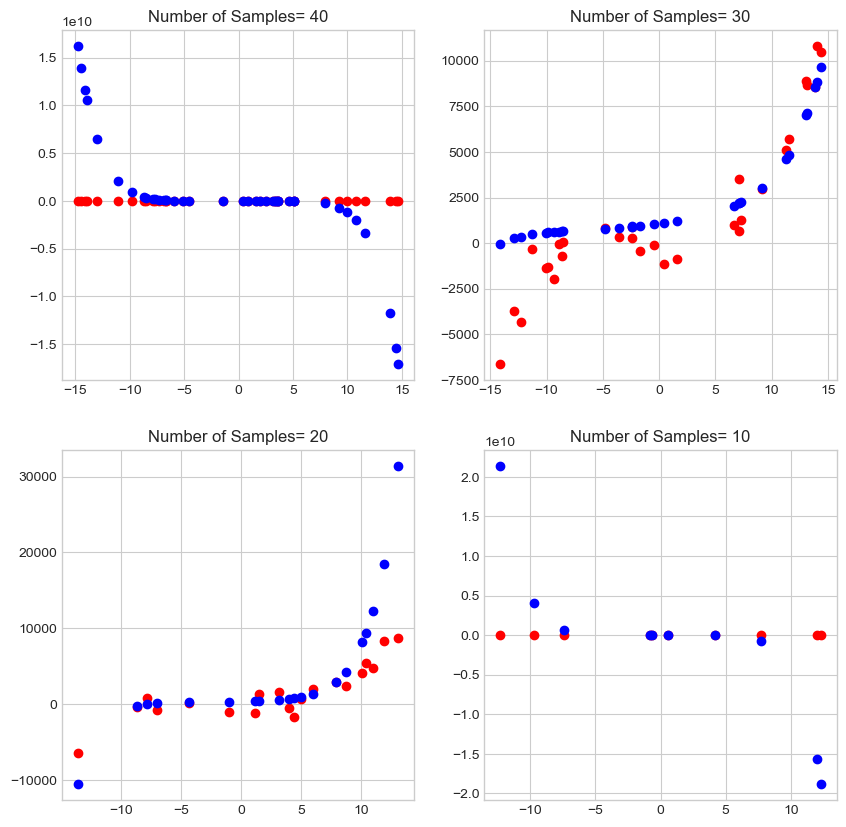

In [16]:
#Q4 - Change variable number_of_samples to 40, 30, 20, 10 respectively, re-ran the algorithm and plot
# the polynomials with the best m found in 2). Discuss the impact of the number of samples to the 
# accuracy of the returned parameters. [You need to plot a figure for EACH choice of 
# number_of_samples.

#This graph may be different, as we are using random function to generate the values of x and y. Since in this question,
# we are generating the values again, the values of x and y won't be same compared to the 1st question and hence the order we 
# are considering in the above examples, may change for this values of x and y.

samplesArr = [40, 30, 20, 10]
figure, axis = plt.subplots(2,2,figsize=(10, 10))
for number_of_samples,ax in zip(samplesArr,axis.flatten()):
    x = 30*(np.random.rand(number_of_samples, 1) - 0.5)
    y = 2 * x + 11 * x**2 + 3 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)
    z = np.polyfit(x[0],y[0],bestOrderPolynomial)
    poly = np.poly1d(z)
    polyArr = poly(x)
    ax.set_title("Number of Samples= {}".format(number_of_samples))
    ax.plot(x,y,'ro')
    ax.plot(x,polyArr,'ro',color='b', label='Polynomial')
    
#If we keep on decreasing the number of samples, we will get very less number of data to test and the accuracy decreases.